In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


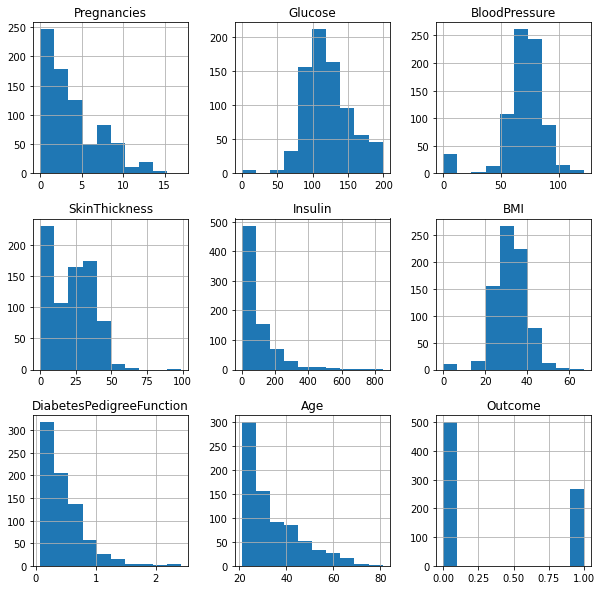

In [3]:
#Plotting histograms
df.hist(figsize=(10,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

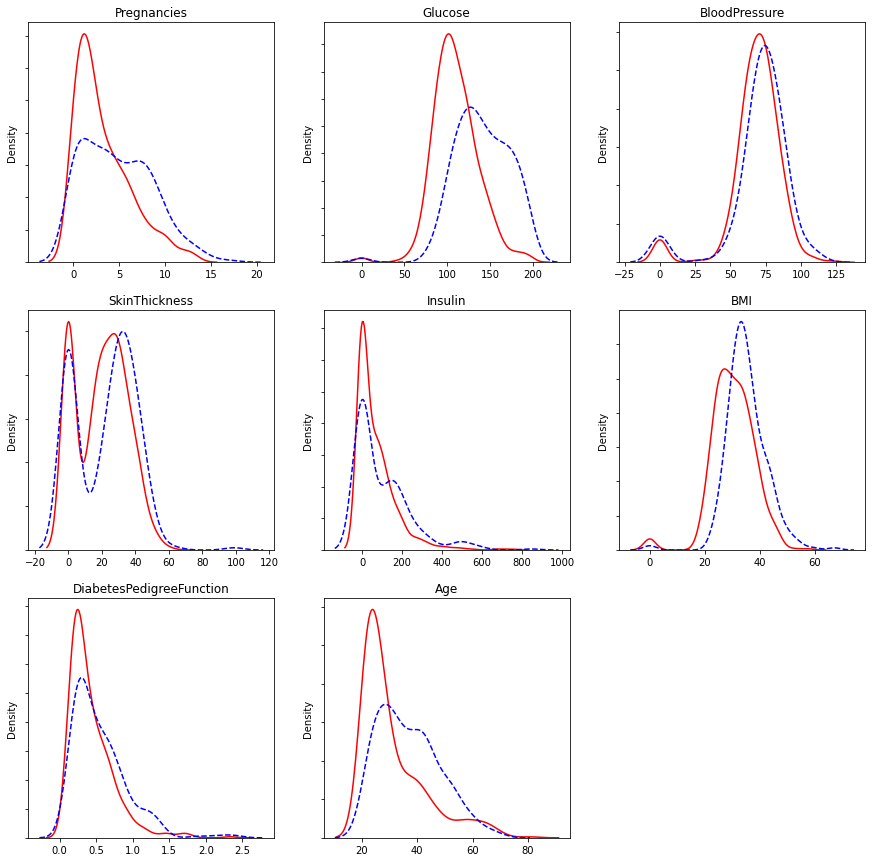

In [4]:
plt.subplots(3,3,figsize = (15,15))
for index, col in enumerate(df.columns):
    ax = plt.subplot(3,3,index +1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist = False,axlabel = False,kde_kws = {'linestyle':'-','color' :'red', 'label':"Not diabetic"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist = False,axlabel = False,kde_kws = {'linestyle':'--','color' :'blue', 'label':"Diabetic"})
    ax.set_title(col)
plt.subplot(3,3,9).set_visible(False)
plt.show()

In [5]:
#Sanity Check
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print("Number of rows with 0 values:")
for column in df.columns:
    null_values = df.loc[df[column]==0].shape[0]
    print(column + ":" +str(null_values))

Number of rows with 0 values:
Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [8]:
#Replacing the values with Nan Values
df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [9]:
#Recheck the data
print("Number of rows with 0 values for each column:")
for column in df.columns:
    missing_rows = df.loc[df[column]==0].shape[0]
    print(column + ":" +str(missing_rows))

Number of rows with 0 values for each column:
Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [10]:
#Replacing with mean.
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [11]:
#Standardizing the data
scaled_df = preprocessing.scale(df)

In [12]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [13]:
#Since we do not want to scale the outcome column as it is our target variable, assigning to its original values
scaled_df['Outcome'] = df['Outcome']
df = scaled_df

In [14]:
df.describe().loc[['mean','std','max'],].round(2).abs()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.35
std,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,0.48
max,3.91,2.54,4.1,7.95,8.13,5.04,5.88,4.06,1.00


In [15]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
#Sequential class from Keras
model = Sequential()
#adding hidden layers
model.add(Dense(32, activation='relu', input_dim=8))
#Adding second hidden layer
model.add(Dense(16, activation='relu'))
#Adding the output layer
model.add(Dense(1, activation='sigmoid'))

In [17]:
#model compilation using ‘adam’ optimizer and ‘binary crossentropy’ loss
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Cross Entropy:**
Cross-entropy is a measure of the difference between two probability distributions for a given random variable/set of occurrences that is based on the idea of information theory entropy(randomness). In both binary and multi-class classification issues, cross entropy can be used. Because the task is a binary classification problem, whether the patient is diabetic or not, we are utilizing binary cross entropy as our loss function.

In [18]:
#training the model for 100 epochs
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
20/20 [==============================] - 3s 13ms/step - loss: 0.7377 - accuracy: 0.4935
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.6467 - accuracy: 0.6629
Epoch 3/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5975 - accuracy: 0.6922
Epoch 4/100
20/20 [==============================] - 0s 13ms/step - loss: 0.5612 - accuracy: 0.7020
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5336 - accuracy: 0.7150
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.5106 - accuracy: 0.7345
Epoch 7/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4940 - accuracy: 0.7394
Epoch 8/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4813 - accuracy: 0.7573
Epoch 9/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4707 - accuracy: 0.7671
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4624 - accuracy: 0.7736
Ep

In [19]:
#training the model for 200 epochs
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
20/20 [==============================] - 0s 10ms/step - loss: 0.3140 - accuracy: 0.8697
Epoch 2/200
20/20 [==============================] - 0s 23ms/step - loss: 0.3134 - accuracy: 0.8697
Epoch 3/200
20/20 [==============================] - 0s 15ms/step - loss: 0.3130 - accuracy: 0.8730
Epoch 4/200
20/20 [==============================] - 0s 15ms/step - loss: 0.3111 - accuracy: 0.8746
Epoch 5/200
20/20 [==============================] - 0s 15ms/step - loss: 0.3121 - accuracy: 0.8746
Epoch 6/200
20/20 [==============================] - 0s 13ms/step - loss: 0.3098 - accuracy: 0.8730
Epoch 7/200
20/20 [==============================] - 0s 15ms/step - loss: 0.3094 - accuracy: 0.8713
Epoch 8/200
20/20 [==============================] - 0s 13ms/step - loss: 0.3088 - accuracy: 0.8779
Epoch 9/200
20/20 [==============================] - 0s 12ms/step - loss: 0.3102 - accuracy: 0.8713
Epoch 10/200
20/20 [==============================] - 0s 13ms/step - loss: 0.3067 - accuracy: 0.8730

## What is the outcome of 100 and 200 epochs? Any difference? Explain.
- The loss function reduces as the epochs increase, and accuracy increases throughout each epoch for both 100 and 200 epochs, as the learning algorithm continuously updates the weights and biases in the MLP according to the training data.

In [20]:
#Accuracy evaluation
scores= model.evaluate(X_train,y_train)
print("Accuracy of training data: %.2f%%\n" % (scores[1]*100))

20/20 [==============================] - 0s 4ms/step - loss: 0.1524 - accuracy: 0.9479
Accuracy of training data: 94.79%



In [21]:
#Accuracy of testing data
scores= model.evaluate(X_test,y_test)
print("Accuracy of testing data: %.2f%%\n" % (scores[1]*100))

5/5 [==============================] - 0s 5ms/step - loss: 0.8825 - accuracy: 0.7208
Accuracy of testing data: 72.08%



Text(33.0, 0.5, 'Actual')

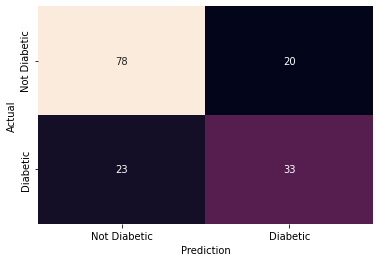

In [22]:
# Confusion Matrix
predictions = model.predict(X_test)
con_matrix = confusion_matrix(y_test, predictions.round())
ax = sns.heatmap(con_matrix, annot=True, xticklabels=['Not Diabetic', 'Diabetic'],
                yticklabels=['Not Diabetic', 'Diabetic'],
                cbar=False)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

## Conclusion:
The majority of the predictions are true negatives or true positives, as evidenced by the confusion matrix. The remaining 20 predictions are false positives, whereas the remaining 23 predictions are false negatives,which is not an ideal scenario. When it comes to diabetes prediction, a false negative is potentially more dangerous than a false positive. A false negative occurs when a doctor incorrectly predicts that a patient will not get diabetes in the next five years when they will. As a result, when evaluating the performance of various models for predicting the development of diabetes, a model with a lower false negative rate, as in our instance, is not preferred.

Text(0, 0.5, 'True Positive Rate')

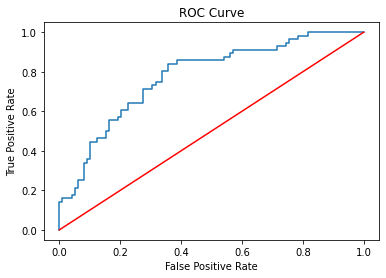

In [23]:
#ROC Curve
y_test_pred_probs= model.predict(X_test)
FPR, TPR, _ = roc_curve(y_test,y_test_pred_probs )
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'-', color='Red') #diagonal line
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## What is the area under the curve?
- We can see from the ROC curve that the AUC is greater, indicating that the model is better at class prediction.
This demonstrates that our model can distinguish between samples of different classes and make accurate predictions.

## Is the MLP better than a logistic regression model? Do you get a better accuracy with a Random Forest model? Why? Show the outcomes of the different models in a table format.
- Fine-tuning the MLP classifier, in my opinion, will produce superior results, potentially even beating the Logistic Regression model. The learning rate can be changed to improve the gradient descent optimization process and avoid local minima, and the number of hidden layers and nodes can be changed to identify the best neural network architecture for the job. I also feel that expanding the training data set will lead to a more accurate model. Although multilayer Perceptron learners are powerful, overfitting can occur if the network is too massive for the underlying data structure.
- Yes, we get a higher accuracy from random forest classifier (0.7634). Random forest regression yields extraordinarily high accuracies using the 'wisdom of the crowds' technique. Other linear models, such as linear regression and logistic regression, frequently provide superior results. The random forest adds more randomness to the model as it grows the trees. Instead than looking for the most important feature when dividing a node, it seeks for the best feature from a random group of features. As a result, there is a great deal of variety, resulting in a superior model with incredibly high accuracy than MLP.

In [25]:
 from pycaret.classification import *
 clf1 = setup(data = df, target = 'Outcome')
 # return best model
 best = compare_models()
 # return top 3 models based on 'Accuracy'
 top3 = compare_models(n_select = 3)
 # return best model based on AUC
 best = compare_models() #default is 'Accuracy'
 # compare specific models
 best_specific = compare_models(include = ['lr','rf','mlp'])
 # blacklist certain models
 best_specific = compare_models(exclude = ['svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7690,0.8379,0.6329,0.7202,0.6709,0.4947,0.4991,0.514
rf,Random Forest Classifier,0.7634,0.8347,0.6324,0.7096,0.6652,0.4836,0.4888,0.584
gbc,Gradient Boosting Classifier,0.7617,0.8291,0.6629,0.6916,0.6751,0.4872,0.4889,0.153
lr,Logistic Regression,0.7597,0.8446,0.5729,0.7282,0.6369,0.4626,0.4726,0.026
ridge,Ridge Classifier,0.7596,0.0000,0.5529,0.7385,0.6288,0.4580,0.4703,0.019
lda,Linear Discriminant Analysis,0.7596,0.8459,0.5579,0.7352,0.6308,0.4591,0.4705,0.024
ada,Ada Boost Classifier,0.7524,0.8277,0.6581,0.6787,0.6666,0.4700,0.4716,0.152
lightgbm,Light Gradient Boosting Machine,0.7487,0.8138,0.6388,0.6768,0.6555,0.4583,0.4603,0.149
nb,Naive Bayes,0.7410,0.8248,0.5981,0.6780,0.6326,0.4342,0.4385,0.022
qda,Quadratic Discriminant Analysis,0.7373,0.8093,0.5583,0.6959,0.6140,0.4188,0.4285,0.023
